In [ ]:
# -*- coding: utf-8 -*-
#Vehicle license plate image processing system
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict

# make tracks
SUPPORTED_EXTENSIONS = ('.png', '.jpg', '.jpeg', '.tif', '.tiff')
INPUT_FOLDER = "/kaggle/input/car-plate-detection/images"
OUTPUT_FOLDER = "/kaggle/working/processed_results"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [ ]:
class PlateProcessor:
    def __init__(self):
        # upload plate file
        cascade_path = cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml'
        if not os.path.exists(cascade_path):
            raise FileNotFoundError("file not exist")
        self.detector = cv2.CascadeClassifier(cascade_path)

In [ ]:
def main_processing():
    # make wanted objects
    io = IOManager()  # 
    processor = PlateProcessor()
    
    try:
        # ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿµŸàÿ± ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ IOManager ÿ®ÿØŸÑÿßŸã ŸÖŸÜ PlateProcessor
        images, names = io.load_images(INPUT_FOLDER)  
        
        if not images:
            print("there is no thotos for processing !")
            return
        
        # ŸÖÿπÿßŸÑÿ¨ÿ© ŸÉŸÑ ÿµŸàÿ±ÿ©
        for idx, (img, name) in enumerate(zip(images, names)):
            print(f"photo prossessingÿ© {idx+1}: {name}")
            
            
            plates = processor.detect_plates(img)
            result_img = img.copy()
            
            for (x, y, w, h) in plates:
                cv2.rectangle(result_img, (x, y), (x+w, y+h), (0, 255, 0), 3)
                plate_region = img[y:y+h, x:x+w]
                processed_plate = processor.preprocess_plate(plate_region)
                
                
                features = processor.extract_features(processed_plate)
                io.save_output(result_img, name, "detection")  
                io.save_output(processed_plate, name, "processed")
                
                # ÿπÿ±ÿ∂ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ŸÑŸÑÿµŸàÿ± ÿßŸÑÿ£ŸàŸÑŸâ
                if idx < 3:
                    io.show_results({  # ÿ™ÿπÿØŸäŸÑ Ÿáÿ∞ÿß ÿßŸÑÿ≥ÿ∑ÿ±
                        'ÿßŸÑÿ£ÿµŸÑŸäÿ©': img,
                        'ÿßŸÑŸÉÿ¥ŸÅ': result_img,
                        'ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©': processed_plate
                    }, f"ŸÜÿ™ÿßÿ¶ÿ¨ {name}")
    
    except Exception as e:
        print(f"ÿÆÿ∑ÿ£: {e}")
    finally:
        print("ÿßŸÜÿ™Ÿáÿ™ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©!")

In [12]:
import os
import cv2

images_dir = r"C:\Users\user\Downloads\archive\images"
supported_exts = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')

images = []
filenames = []

for filename in sorted(os.listdir(images_dir)):
    if filename.lower().endswith(supported_exts):
        img_path = os.path.join(images_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            filenames.append(filename)
        if len(images) == 5:
            break

# ÿßÿ∑ÿ®ÿπ ÿ£ÿ≥ŸÖÿßÿ° ÿßŸÑÿµŸàÿ± Ÿàÿ£ÿ®ÿπÿßÿØŸáÿß ŸÑŸÑÿ™ÿ£ŸÉÿØ
for i, (name, img) in enumerate(zip(filenames, images), 1):
    print(f"ÿßŸÑÿµŸàÿ±ÿ© {i}: {name}, ÿßŸÑÿ£ÿ®ÿπÿßÿØ: {img.shape}")


ÿßŸÑÿµŸàÿ±ÿ© 1: Cars0.png, ÿßŸÑÿ£ÿ®ÿπÿßÿØ: (268, 500, 3)
ÿßŸÑÿµŸàÿ±ÿ© 2: Cars1.png, ÿßŸÑÿ£ÿ®ÿπÿßÿØ: (248, 400, 3)
ÿßŸÑÿµŸàÿ±ÿ© 3: Cars10.png, ÿßŸÑÿ£ÿ®ÿπÿßÿØ: (225, 400, 3)
ÿßŸÑÿµŸàÿ±ÿ© 4: Cars100.png, ÿßŸÑÿ£ÿ®ÿπÿßÿØ: (267, 400, 3)
ÿßŸÑÿµŸàÿ±ÿ© 5: Cars101.png, ÿßŸÑÿ£ÿ®ÿπÿßÿØ: (300, 400, 3)


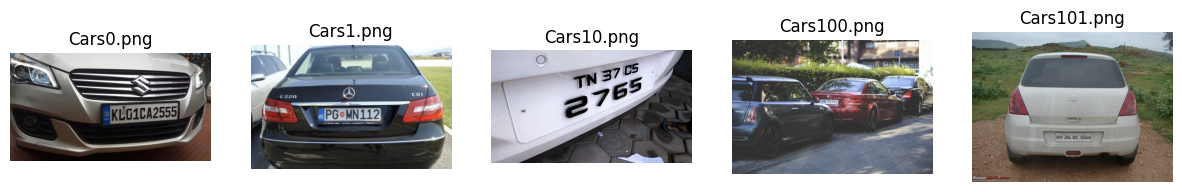

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

for i, (name, img) in enumerate(zip(filenames, images), 1):
    plt.subplot(1, 5, i)  # 1 ÿµŸÅ Ÿà5 ÿ£ÿπŸÖÿØÿ©ÿå ŸàÿßŸÑÿµŸàÿ±ÿ© ÿ±ŸÇŸÖ i
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # ÿπÿ¥ÿßŸÜ cv2 ÿ®ÿ™ÿ±ÿ™ÿ® ÿßŸÑÿ£ŸÑŸàÿßŸÜ BGRÿå ÿ®ŸÜÿ≠ŸàŸÑŸáÿß ŸÑŸÄ RGB
    plt.title(name)
    plt.axis('off')

plt.show()


In [14]:
import cv2
import numpy as np
import os

# ÿØÿπŸÖ ÿßŸÑÿµŸäÿ∫ ÿßŸÑŸÖÿ∑ŸÑŸàÿ®ÿ©
SUPPORTED_FORMATS = ('.jpg', '.png', '.tif')


In [15]:
def load_image(path: str) -> np.ndarray:
    """
    ÿ™ÿ≠ŸÖŸÑ ÿßŸÑÿµŸàÿ±ÿ© ŸÖŸÜ ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑŸÖÿ≠ÿØÿØ.
    - path: ŸÖÿ≥ÿßÿ± ÿßŸÑÿµŸàÿ±ÿ©.
    - ÿ™ÿπŸäÿØ: ÿßŸÑÿµŸàÿ±ÿ© ŸÉŸÄ numpy array.
    - ÿ™ÿ±ŸÖŸä ÿßÿ≥ÿ™ÿ´ŸÜÿßÿ° ŸÅŸä ÿ≠ÿßŸÑÿ© ÿπÿØŸÖ Ÿàÿ¨ŸàÿØ ÿßŸÑÿµŸàÿ±ÿ© ÿ£Ÿà ÿµŸäÿ∫ÿ© ÿ∫Ÿäÿ± ŸÖÿØÿπŸàŸÖÿ©.
    """
    if not os.path.isfile(path):
        raise FileNotFoundError(f"ŸÖŸÑŸÅ ÿßŸÑÿµŸàÿ±ÿ© ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {path}")
    if not path.lower().endswith(SUPPORTED_FORMATS):
        raise ValueError(f"ÿµŸäÿ∫ÿ© ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖÿØÿπŸàŸÖÿ©: {path}")
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"ŸÅÿ¥ŸÑ ŸÅŸä ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿµŸàÿ±ÿ©: {path}")
    return img


In [16]:
def adjust_brightness_contrast(img: np.ndarray, brightness=0, contrast=0) -> np.ndarray:
    """
    ÿ™ÿπÿØŸÑ ÿßŸÑÿ≥ÿ∑Ÿàÿπ ŸàÿßŸÑÿ™ÿ®ÿßŸäŸÜ ŸÑŸÑÿµŸàÿ±ÿ©.
    - brightness: ŸÇŸäŸÖÿ© ÿ™ÿ™ÿ±ÿßŸàÿ≠ ŸÖŸÜ -100 ÿ•ŸÑŸâ 100.
    - contrast: ŸÇŸäŸÖÿ© ÿ™ÿ™ÿ±ÿßŸàÿ≠ ŸÖŸÜ -100 ÿ•ŸÑŸâ 100.
    - ÿ™ÿπŸäÿØ ÿßŸÑÿµŸàÿ±ÿ© ÿ®ÿπÿØ ÿßŸÑÿ™ÿπÿØŸäŸÑ.
    """
    beta = brightness
    alpha = 1 + (contrast / 100.0)  # ŸÖÿ´ÿßŸÑ: 20% ÿ≤ŸäÿßÿØÿ© ÿ™ÿπŸÜŸä alpha = 1.2
    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted


In [17]:
def apply_gaussian_blur(img: np.ndarray, kernel_size=(5,5)) -> np.ndarray:
    """
    ÿ™ÿ∑ÿ®ŸÇ Gaussian Blur ÿπŸÑŸâ ÿßŸÑÿµŸàÿ±ÿ© ŸÑÿ™ŸÇŸÑŸäŸÑ ÿßŸÑÿ™ŸÅÿßÿµŸäŸÑ.
    - kernel_size: ÿ≠ÿ¨ŸÖ ÿßŸÑŸÜŸàÿßÿ©ÿå Ÿäÿ¨ÿ® ÿ£ŸÜ ÿ™ŸÉŸàŸÜ ÿ£ÿπÿØÿßÿØ ŸÅÿ±ÿØŸäÿ©.
    - ÿ™ÿπŸäÿØ ÿßŸÑÿµŸàÿ±ÿ© ÿßŸÑŸÖŸÅŸÑÿ™ÿ±ÿ©.
    """
    blurred = cv2.GaussianBlur(img, kernel_size, 0)
    return blurred


In [18]:
def detect_edges(img: np.ndarray, low_threshold=100, high_threshold=200) -> np.ndarray:
    """
    ÿ™ÿ∑ÿ®ŸÇ ŸÉÿ¥ŸÅ ÿßŸÑÿ≠ŸàÿßŸÅ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ© Canny.
    - low_threshold Ÿà high_threshold: ÿ≠ÿØŸàÿØ ÿßŸÑŸÉÿ¥ŸÅ.
    - ÿ™ÿπŸäÿØ ÿµŸàÿ±ÿ© ÿ´ŸÜÿßÿ¶Ÿäÿ© ÿ™ÿ∏Ÿáÿ± ÿßŸÑÿ≠ŸàÿßŸÅ.
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, low_threshold, high_threshold)
    return edges


In [19]:
def denoise_image(img: np.ndarray) -> np.ndarray:
    """
    ÿ™ÿ∑ÿ®ŸÇ ÿ™ŸÇŸÑŸäŸÑ ÿßŸÑÿ™ÿ¥ŸàŸäÿ¥ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ Non-local Means Denoising.
    - ÿ™ÿπŸäÿØ ÿßŸÑÿµŸàÿ±ÿ© ÿ®ÿπÿØ ÿßŸÑÿ™ŸÜŸÇŸäÿ©.
    """
    denoised = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    return denoised


In [20]:
def extract_features(img: np.ndarray, max_corners=100) -> np.ndarray:
    """
    ÿ™ÿ≥ÿ™ÿÆÿ±ÿ¨ ŸÖŸäÿ≤ÿßÿ™ (ŸÜŸÇÿßÿ∑ ÿ≤ŸàÿßŸäÿß) ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿ∑ÿ±ŸäŸÇÿ© Shi-Tomasi.
    - ÿ™ÿπŸäÿØ ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑŸÜŸÇÿßÿ∑.
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, max_corners, 0.01, 10)
    if corners is not None:
        corners = np.int0(corners)
    return corners


In [21]:
def save_image(img: np.ndarray, output_dir: str, filename: str):
    """
    ÿ™ÿ≠ŸÅÿ∏ ÿßŸÑÿµŸàÿ±ÿ© ŸÅŸä ÿßŸÑŸÖÿ¨ŸÑÿØ ÿßŸÑŸÖÿ≠ÿØÿØ ŸÖÿπ ÿßÿ≥ŸÖ ÿßŸÑŸÖŸÑŸÅ.
    - Ÿäÿ™ÿ£ŸÉÿØ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÖÿ¨ŸÑÿØ ÿ£Ÿà ŸäŸÜÿ¥ÿ¶Ÿá.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, img)


In [ ]:
def main():
    input_path = r"C:\Users\user\Downloads\archive\images\Cars0.png"  # ÿ∫Ÿäÿ± ÿßŸÑŸÖÿ≥ÿßÿ± ÿ≠ÿ≥ÿ® ÿßŸÑÿµŸàÿ±ÿ©
    output_dir = "processed_images"
    
    try:
        img = load_image(input_path)
        
        bright_img = adjust_brightness_contrast(img, brightness=30, contrast=30)
        save_image(bright_img, output_dir, "brightness_contrast.png")
        
        blurred_img = apply_gaussian_blur(bright_img)
        save_image(blurred_img, output_dir, "gaussian_blur.png")
        
        denoised_img = denoise_image(blurred_img)
        save_image(denoised_img, output_dir, "denoised.png")
        
        edges_img = detect_edges(denoised_img)
        save_image(edges_img, output_dir, "edges.png")
        
        features = extract_features(denoised_img)
        if features is not None:
            for corner in features:
                x, y = corner.ravel()
                cv2.circle(denoised_img, (x, y), 5, (0, 255, 0), -1)
            save_image(denoised_img, output_dir, "features.png")
        print("there is no  photo to edit")
        
    except Exception as e:
        print(f"ÿ≠ÿØÿ´ ÿÆÿ∑ÿ£ ÿ£ÿ´ŸÜÿßÿ° ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©: {e}")

if __name__ == "__main__":
    main()


ÿ≠ÿØÿ´ ÿÆÿ∑ÿ£ ÿ£ÿ´ŸÜÿßÿ° ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©: module 'numpy' has no attribute 'int0'


In [23]:
import cv2
import numpy as np
import os

# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿµŸàÿ±ÿ©
def load_image(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"ŸÖŸÑŸÅ ÿßŸÑÿµŸàÿ±ÿ© ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {path}")
    img = cv2.imread(path)
    if img is None:
        raise ValueError("ŸÅÿ¥ŸÑ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿµŸàÿ±ÿ©!")
    return img

# ÿ≠ŸÅÿ∏ ÿßŸÑÿµŸàÿ±ÿ©
def save_image(img, output_dir, filename):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    cv2.imwrite(os.path.join(output_dir, filename), img)

# ÿ™ÿπÿØŸäŸÑ ÿßŸÑÿ≥ÿ∑Ÿàÿπ ŸàÿßŸÑÿ™ÿ®ÿßŸäŸÜ
def adjust_brightness_contrast(img, brightness=0, contrast=0):
    return cv2.convertScaleAbs(img, alpha=1 + contrast / 100, beta=brightness)

# ÿ™ÿ∑ÿ®ŸäŸÇ Gaussian Blur
def apply_gaussian_blur(img, kernel_size=(5, 5), sigma=0):
    return cv2.GaussianBlur(img, kernel_size, sigma)

# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ∂Ÿàÿ∂ÿßÿ° ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ Non-local Means
def denoise_image(img):
    return cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

# ŸÉÿ¥ŸÅ ÿßŸÑÿ≠ŸàÿßŸÅ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ Canny
def detect_edges(img, threshold1=100, threshold2=200):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(gray, threshold1, threshold2)

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑŸÖÿπÿßŸÑŸÖ (ÿ±ŸÉÿßÿ¶ÿ≤ ÿßŸÑÿ≤ŸàÿßŸäÿß)
def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=50, qualityLevel=0.01, minDistance=10)
    if corners is not None:
        corners = corners.astype(np.int32)
    return corners


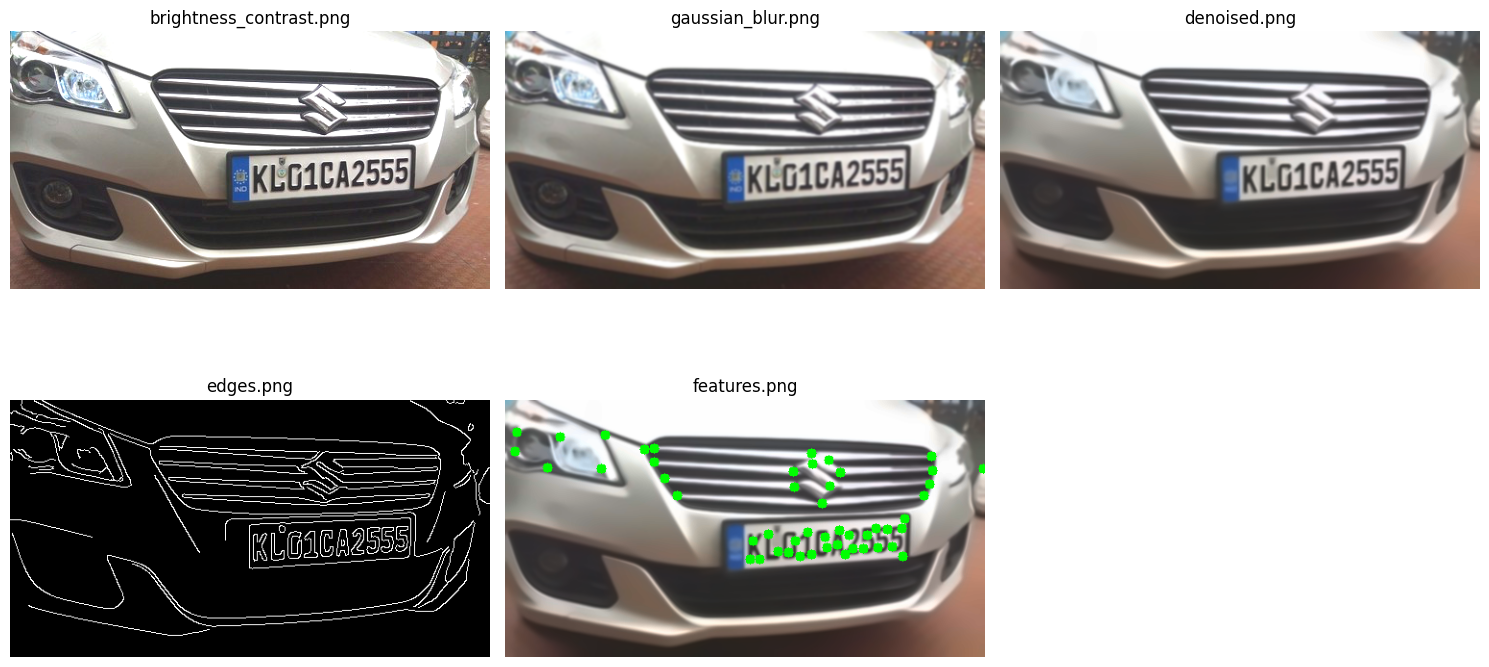

In [25]:
import cv2
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ ÿßŸÑÿµŸàÿ± ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©
output_dir = "processed_images"

# ÿ£ÿ≥ŸÖÿßÿ° ÿßŸÑÿµŸàÿ± ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©
image_files = [
    "brightness_contrast.png",
    "gaussian_blur.png",
    "denoised.png",
    "edges.png",
    "features.png"
]

# ÿπÿØÿØ ÿßŸÑÿµŸàÿ±
num_images = len(image_files)

# ÿ•ÿπÿØÿßÿØ ÿßŸÑÿ¥ŸÉŸÑ
plt.figure(figsize=(15, 8))

# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿµŸàÿ± Ÿàÿπÿ±ÿ∂Ÿáÿß
for i, filename in enumerate(image_files, 1):
    path = os.path.join(output_dir, filename)
    img = cv2.imread(path)

    if img is not None:
        # ŸÑŸà ÿßŸÑÿµŸàÿ±ÿ© grayscale (edges)ÿå ÿ≠ŸàŸÑŸáÿß ÿπÿ¥ÿßŸÜ ÿ™ÿ™ÿπÿ±ÿ∂ ÿµÿ≠
        if len(img.shape) == 2:
            img_display = img
            cmap = 'gray'
        else:
            img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            cmap = None

        plt.subplot(2, 3, i)
        plt.imshow(img_display, cmap=cmap)
        plt.title(filename)
        plt.axis('off')
    else:
        print(f"‚ùå ÿßŸÑÿµŸàÿ±ÿ© ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØÿ©: {filename}")

plt.tight_layout()
plt.show()


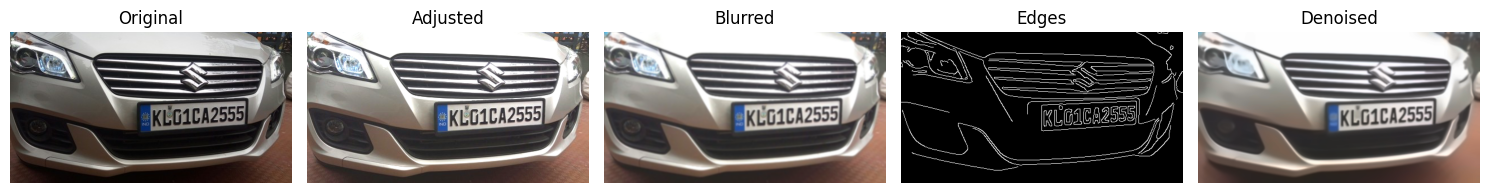

In [26]:
import cv2
import matplotlib.pyplot as plt
import os

# ÿßŸÑŸÖÿ≥ÿßÿ± ÿ•ŸÑŸâ ŸÖÿ¨ŸÑÿØ ÿßŸÑÿµŸàÿ± ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ©
output_dir = "processed_images"

# ÿ£ÿ≥ŸÖÿßÿ° ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ≠ÿ≥ÿ® ÿßŸÑÿ™ÿ±ÿ™Ÿäÿ®
image_files = [
    "brightness_contrast.png",  # Adjusted
    "gaussian_blur.png",        # Blurred
    "edges.png",                # Edges
    "denoised.png",             # Denoised
    "features.png"              # Optional (for visualization)
]

# ÿßŸÑÿπŸÜÿßŸàŸäŸÜ
titles = ['Original', 'Adjusted', 'Blurred', 'Edges', 'Denoised']

# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿµŸàÿ±ÿ© ÿßŸÑÿ£ÿµŸÑŸäÿ©
original_path = r"C:\Users\user\Downloads\archive\images\Cars0.png"  # ÿ∫ŸäŸëÿ± ÿßŸÑÿßÿ≥ŸÖ ÿ≠ÿ≥ÿ® ÿµŸàÿ±ÿ™ŸÉ ÿßŸÑÿ£ÿµŸÑŸäÿ©
original_img = cv2.imread(original_path)

# ÿ•ÿπÿØÿßÿØ ÿßŸÑÿ¥ŸÉŸÑ
plt.figure(figsize=(15, 6))

# ÿπÿ±ÿ∂ ÿßŸÑÿµŸàÿ±ÿ© ÿßŸÑÿ£ÿµŸÑŸäÿ© ÿ£ŸàŸÑÿßŸã
if original_img is not None:
    img_display = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, 1)
    plt.imshow(img_display)
    plt.title(titles[0])
    plt.axis('off')
else:
    print("‚ùå ÿßŸÑÿµŸàÿ±ÿ© ÿßŸÑÿ£ÿµŸÑŸäÿ© ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØÿ©")

# ÿπÿ±ÿ∂ ÿ®ÿßŸÇŸä ÿßŸÑÿµŸàÿ±
for i, (filename, title) in enumerate(zip(image_files, titles[1:]), 2):
    path = os.path.join(output_dir, filename)
    img = cv2.imread(path)

    if img is not None:
        if len(img.shape) == 2:
            img_display = img
            cmap = 'gray'
        else:
            img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            cmap = None

        plt.subplot(1, 5, i)
        plt.imshow(img_display, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    else:
        print(f"‚ùå ÿßŸÑÿµŸàÿ±ÿ© ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØÿ©: {filename}")

plt.tight_layout()
plt.show()


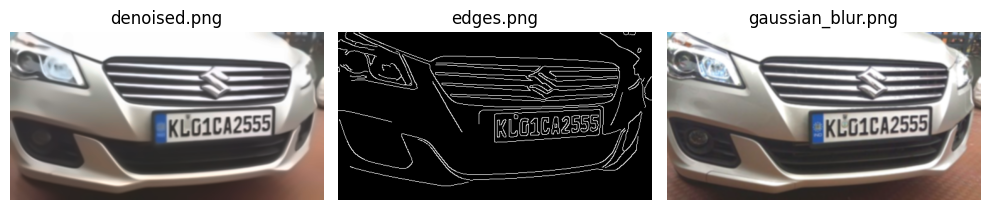

In [27]:
import os
import cv2
import random
import matplotlib.pyplot as plt

OUTPUT_DIR = "processed_images"

samples = random.sample(os.listdir(OUTPUT_DIR), 3)

plt.figure(figsize=(10, 4))
for i, filename in enumerate(samples):
    img_path = os.path.join(OUTPUT_DIR, filename)
    img = cv2.imread(img_path)
    plt.subplot(1, 3, i + 1)
    # ŸÑŸà ÿßÿ≥ŸÖ ÿßŸÑŸÖŸÑŸÅ ŸÅŸäŸá 'denoised' ŸÜÿπÿ±ÿ∂ ÿßŸÑÿµŸàÿ±ÿ© ÿ£ŸÑŸàÿßŸÜÿå ÿ∫Ÿäÿ± ŸÉÿØŸá ÿµŸàÿ±ÿ© ÿ±ŸÖÿßÿØŸäÿ©
    if 'denoised' in filename or filename.endswith(('.png', '.jpg', '.jpeg')):
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.title(filename)
    plt.axis('off')
plt.tight_layout()
plt.show()


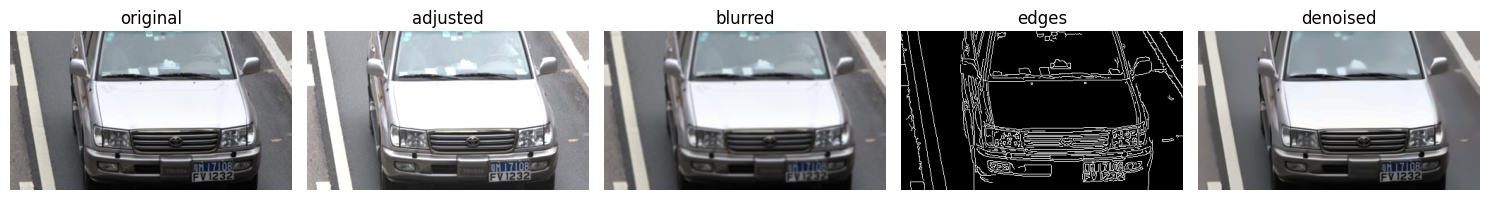

In [28]:
import cv2
import matplotlib.pyplot as plt

def process_sample_image(image_path):
    """Process a sample image and return results"""
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"ŸÖŸÑŸÅ ÿßŸÑÿµŸàÿ±ÿ© ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØ: {image_path}")
    
    results = {
        'original': img,
        'adjusted': cv2.convertScaleAbs(img, alpha=1.2, beta=20),
        'blurred': cv2.GaussianBlur(img, (5,5), 0),
        'edges': cv2.Canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 50, 150),
        'denoised': cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    }
    return results

def create_collage(images_dict):
    """ÿπÿ±ÿ∂ ÿßŸÑÿµŸàÿ± ÿ¨ŸÜÿ® ÿ®ÿπÿ∂ ŸÖÿπ ÿπŸÜŸàÿßŸÜ ŸÑŸÉŸÑ ÿµŸàÿ±ÿ©"""
    titles = list(images_dict.keys())
    images = list(images_dict.values())
    
    plt.figure(figsize=(15,5))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i+1)
        if titles[i] == 'edges':
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    image_path = r"C:\Users\user\Downloads\archive\images\Cars26.png"  # ÿ∫Ÿäÿ± ÿßŸÑŸÖÿ≥ÿßÿ± ŸÑŸÖÿ≥ÿßÿ± ÿµŸàÿ±ÿ™ŸÉ ÿπŸÜÿØŸÉ
    results = process_sample_image(image_path)
    create_collage(results)


In [41]:
import cv2
import numpy as np
import os

def load_image(file_path):
    """
    ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿµŸàÿ±ÿ© ŸÖŸÜ ÿßŸÑŸÖÿ≥ÿßÿ± ŸÖÿπ ÿßŸÑÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ ÿßŸÑÿµŸäÿ∫ÿ©.
    ŸäÿØÿπŸÖ jpg, png, tif.
    Raises FileNotFoundError, ValueError.
    """
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"ÿßŸÑÿµŸàÿ±ÿ© ÿ∫Ÿäÿ± ŸÖŸàÿ¨ŸàÿØÿ©: {file_path}")
    
    ext = os.path.splitext(file_path)[1].lower()
    if ext not in ['.jpg', '.jpeg', '.png', '.tif', '.tiff']:
        raise ValueError(f"ŸÜŸàÿπ ÿßŸÑŸÖŸÑŸÅ ÿ∫Ÿäÿ± ŸÖÿØÿπŸàŸÖ: {ext}")
    
    img = cv2.imread(file_path)
    if img is None:
        raise IOError("ŸÅÿ¥ŸÑ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿµŸàÿ±ÿ© (ŸÇÿØ ÿ™ŸÉŸàŸÜ ÿ™ÿßŸÑŸÅÿ©).")
    return img

def save_image(img, output_dir, filename):
    """
    ÿ≠ŸÅÿ∏ ÿßŸÑÿµŸàÿ±ÿ© ŸÅŸä ÿßŸÑŸÖÿ¨ŸÑÿØ ÿßŸÑŸÖÿ≠ÿØÿØ ŸÖÿπ ÿ•ŸÜÿ¥ÿßÿ° ÿßŸÑŸÖÿ¨ŸÑÿØ ÿ•ÿ∞ÿß ŸÑŸÖ ŸäŸÉŸÜ ŸÖŸàÿ¨ŸàÿØŸãÿß.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    path = os.path.join(output_dir, filename)
    cv2.imwrite(path, img)
    print(f"üì∏ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑÿµŸàÿ±ÿ©: {path}")

def adjust_brightness_contrast(img, brightness=0, contrast=0):
    """
    ÿ™ÿπÿØŸäŸÑ ÿßŸÑÿ≥ÿ∑Ÿàÿπ ŸàÿßŸÑÿ™ÿ®ÿßŸäŸÜ.
    brightness: -100 ÿ•ŸÑŸâ 100
    contrast: -100 ÿ•ŸÑŸâ 100
    """
    beta = brightness
    alpha = 1 + (contrast / 100.0)
    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted

def apply_gaussian_blur(img, kernel_size=(5,5), sigma=0):
    """
    ÿ™ÿ∑ÿ®ŸäŸÇ Gaussian Blur ŸÑÿ™ŸÇŸÑŸäŸÑ ÿßŸÑÿ™ŸÅÿßÿµŸäŸÑ ŸàÿßŸÑÿ™ÿ¥ŸàŸäÿ¥.
    """
    blurred = cv2.GaussianBlur(img, kernel_size, sigma)
    return blurred

def detect_edges(img, low_threshold=50, high_threshold=150):
    """
    ŸÉÿ¥ŸÅ ÿßŸÑÿ≠ŸàÿßŸÅ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿ© Canny.
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, low_threshold, high_threshold)
    return edges

def denoise_image(img, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21):
    """
    ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ™ÿ¥ŸàŸäÿ¥ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ Non-local Means Denoising.
    """
    denoised = cv2.fastNlMeansDenoisingColored(img, None, h, hColor, templateWindowSize, searchWindowSize)
    return denoised

def extract_features(img, max_corners=100, quality_level=0.01, min_distance=10):
    """
    ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ŸÜŸÇÿßÿ∑ ŸÖŸäÿ≤ÿßÿ™ (corners) ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ Shi-Tomasi Corner Detection.
    ŸäÿπŸäÿØ ŸÇÿßÿ¶ŸÖÿ© ŸÖŸÜ ÿßŸÑŸÜŸÇÿßÿ∑.
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance)
    if corners is not None:
        corners = np.int0(corners)
    return corners


In [ ]:
import cv2  # Import OpenCV library for image processing
import numpy as np  # Import NumPy for array operations
import os  # Import os for file and directory handling
from skimage.feature import hog  # Import HOG feature extractor
from skimage import color  # Import color module from skimage (not used here but imported)

def load_image(path):
    try:
        if not os.path.isfile(path):
            raise FileNotFoundError(f"File not found: {path}")  # Check if file exists
        ext = os.path.splitext(path)[1].lower()  # Get file extension
        if ext not in ['.jpg', '.jpeg', '.png', '.tif', '.tiff']:
            raise ValueError("Unsupported file type. Use jpg, png or tif.")  # Validate extension
        img = cv2.imread(path)  # Read image using OpenCV
        if img is None:
            raise ValueError("Failed to load image - file may be corrupted.")  # Check if image loaded successfully
        return img  # Return loaded image
    except Exception as e:
        print(f"[load_image] {e}")  # Print error message if exception occurs
        return None  # Return None on failure

def save_image(img, output_dir, filename):
    try:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)  # Create output directory if it doesn't exist
        path = os.path.join(output_dir, filename)  # Construct full save path
        cv2.imwrite(path, img)  # Save image to disk
        print(f"Image saved: {path}")  # Confirm saving image
    except Exception as e:
        print(f"[save_image] Error: {e}")  # Print error if saving fails

def adjust_brightness_contrast(img, brightness=0, contrast=0):
    try:
        beta = brightness  # Set brightness level
        alpha = 1 + (contrast / 100.0)  # Calculate contrast scale factor
        adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)  # Apply brightness and contrast
        return adjusted  # Return adjusted image
    except Exception as e:
        print(f"[adjust_brightness_contrast] Error: {e}")  # Error handling
        return img  # Return original image on failure

def apply_gaussian_blur(img, kernel_size=(5,5)):
    try:
        blurred = cv2.GaussianBlur(img, kernel_size, 0)  # Apply Gaussian blur with given kernel
        return blurred  # Return blurred image
    except Exception as e:
        print(f"[apply_gaussian_blur] Error: {e}")  # Error handling
        return img  # Return original image on failure

def denoise_image(img):
    try:
        denoised = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)  # Apply color denoising
        return denoised  # Return denoised image
    except Exception as e:
        print(f"[denoise_image] Error: {e}")  # Error handling
        return img  # Return original image on failure

def detect_edges(img):
    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale
        edges = cv2.Canny(gray, 100, 200)  # Detect edges using Canny algorithm
        return edges  # Return edge map
    except Exception as e:
        print(f"[detect_edges] Error: {e}")  # Error handling
        return img  # Return original image on failure

def extract_features(img):
    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        gray = np.float32(gray)  # Convert to float32 for Harris detector
        dst = cv2.cornerHarris(gray, 2, 3, 0.04)  # Detect corners using Harris algorithm
        dst = cv2.dilate(dst, None)  # Dilate corner points to enhance
        img_with_corners = img.copy()  # Copy original image to draw corners
        img_with_corners[dst > 0.01 * dst.max()] = [0, 0, 255]  # Mark corners in red
        return img_with_corners  # Return image with corners marked
    except Exception as e:
        print(f"[extract_features] Error: {e}")  # Error handling
        return img  # Return original image on failure

def extract_classification_features(img):
    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')  # Extract HOG features
        return features, hog_image  # Return feature vector and visualization image
    except Exception as e:
        print(f"[extract_classification_features] Error: {e}")  # Error handling
        return [], img  # Return empty features and original image on failure

def main():
    input_path = r"C:\Users\user\Downloads\archive\images\Cars2.png"  # Set input image path
    output_dir = r"C:\Users\user\Downloads\archive\processed_images"  # Set output directory path

    img = load_image(input_path)  # Load image
    if img is None:
        print("Processing stopped: unable to load image.")  # Stop if load failed
        return

    bright_img = adjust_brightness_contrast(img, brightness=30, contrast=30)  # Adjust brightness and contrast
    save_image(bright_img, output_dir, "brightness_contrast.png")  # Save adjusted image

    blurred_img = apply_gaussian_blur(bright_img)  # Apply Gaussian blur
    save_image(blurred_img, output_dir, "gaussian_blur.png")  # Save blurred image

    denoised_img = denoise_image(blurred_img)  # Apply denoising
    save_image(denoised_img, output_dir, "denoised.png")  # Save denoised image

    edges_img = detect_edges(denoised_img)  # Detect edges
    save_image(edges_img, output_dir, "edges.png")  # Save edges image

    features_img = extract_features(denoised_img)  # Extract corners/features
    save_image(features_img, output_dir, "features.png")  # Save image with features

    features_vector, hog_vis = extract_classification_features(denoised_img)  # Extract HOG features
    if len(features_vector) > 0:
        save_image((hog_vis * 255).astype("uint8"), output_dir, "hog_features.png")  # Save HOG visualization
        print(f"Number of classification features: {len(features_vector)}")  # Print feature count
    else:
        print("Warning: No HOG features extracted.")  # Warn if no features extracted

    print("Processing completed successfully.")  # Processing complete message

if __name__ == "__main__":
    main()  # Run main function

Image saved: C:\Users\user\Downloads\archive\processed_images\brightness_contrast.png
Image saved: C:\Users\user\Downloads\archive\processed_images\gaussian_blur.png
Image saved: C:\Users\user\Downloads\archive\processed_images\denoised.png
Image saved: C:\Users\user\Downloads\archive\processed_images\edges.png
Image saved: C:\Users\user\Downloads\archive\processed_images\features.png
Image saved: C:\Users\user\Downloads\archive\processed_images\hog_features.png
Number of classification features: 86436
Processing completed successfully.


In [61]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import ttk
from PIL import Image, ImageTk
import cv2
import numpy as np
import os
from skimage.feature import hog

# ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑÿµŸàÿ±
def load_image(path):
    if not os.path.isfile(path):
        raise FileNotFoundError(f"File not found: {path}")
    ext = os.path.splitext(path)[1].lower()
    if ext not in ['.jpg', '.jpeg', '.png', '.tif', '.tiff']:
        raise ValueError("Unsupported file type.")
    img = cv2.imread(path)
    if img is None:
        raise ValueError("Failed to load image.")
    return img

def adjust_brightness_contrast(img, brightness=30, contrast=30):
    beta = brightness
    alpha = 1 + (contrast / 100.0)
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

def apply_gaussian_blur(img):
    return cv2.GaussianBlur(img, (5,5), 0)

def denoise_image(img):
    return cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

def detect_edges(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(gray, 100, 200)

def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    img_with_corners = img.copy()
    img_with_corners[dst > 0.01 * dst.max()] = [0, 0, 255]
    return img_with_corners

def extract_classification_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
    return features, hog_image


class ImageApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Image Processing GUI")
        self.root.geometry("1000x600")
        self.root.configure(bg="#f0f0f0")

        self.img = None
        self.tk_img = None

        title = tk.Label(root, text="Image Processing App", font=("Helvetica", 18, "bold"), bg="#f0f0f0")
        title.pack(pady=10)

        top_frame = tk.Frame(root, bg="#f0f0f0")
        top_frame.pack(pady=10)

        btn_frame = tk.Frame(top_frame, bg="#f0f0f0")
        btn_frame.pack(side=tk.LEFT, padx=10)

        self.btn_load = ttk.Button(btn_frame, text="Load Image", command=self.load_image)
        self.btn_load.pack(pady=5)

        # checkboxes
        self.var_bright = tk.IntVar()
        self.var_blur = tk.IntVar()
        self.var_denoise = tk.IntVar()
        self.var_edges = tk.IntVar()
        self.var_features = tk.IntVar()
        self.var_hog = tk.IntVar()

        tk.Checkbutton(btn_frame, text="Brightness/Contrast", variable=self.var_bright, bg="#f0f0f0").pack(anchor="w")
        tk.Checkbutton(btn_frame, text="Gaussian Blur", variable=self.var_blur, bg="#f0f0f0").pack(anchor="w")
        tk.Checkbutton(btn_frame, text="Denoise", variable=self.var_denoise, bg="#f0f0f0").pack(anchor="w")
        tk.Checkbutton(btn_frame, text="Detect Edges", variable=self.var_edges, bg="#f0f0f0").pack(anchor="w")
        tk.Checkbutton(btn_frame, text="Extract Features", variable=self.var_features, bg="#f0f0f0").pack(anchor="w")
        tk.Checkbutton(btn_frame, text="Extract HOG Features", variable=self.var_hog, bg="#f0f0f0").pack(anchor="w")

        self.btn_process = ttk.Button(btn_frame, text="Process Image", command=self.process_image)
        self.btn_process.pack(pady=10)

        # canvas ŸÑÿπÿ±ÿ∂ ÿßŸÑÿµŸàÿ±ÿ©
        self.canvas = tk.Canvas(top_frame, width=600, height=500, bg="white", bd=2, relief=tk.RIDGE)
        self.canvas.pack(side=tk.RIGHT, padx=10)

    def load_image(self):
        file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png *.tif *.tiff")])
        if file_path:
            try:
                self.img = load_image(file_path)
                self.show_image(self.img)
            except Exception as e:
                messagebox.showerror("Error", str(e))

    def show_image(self, img):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_pil = img_pil.resize((600, 500))
        self.tk_img = ImageTk.PhotoImage(img_pil)
        self.canvas.create_image(0, 0, anchor="nw", image=self.tk_img)

    def process_image(self):
        if self.img is None:
            messagebox.showwarning("Warning", "Please load an image first!")
            return

        img = self.img.copy()
        if self.var_bright.get():
            img = adjust_brightness_contrast(img)
        if self.var_blur.get():
            img = apply_gaussian_blur(img)
        if self.var_denoise.get():
            img = denoise_image(img)
        if self.var_edges.get():
            img = detect_edges(img)
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        if self.var_features.get():
            img = extract_features(img)
        if self.var_hog.get():
            features, hog_vis = extract_classification_features(img)
            img = (hog_vis * 255).astype("uint8")
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

        self.show_image(img)
        messagebox.showinfo("Done", "Processing completed!")

if __name__ == "__main__":
    root = tk.Tk()
    app = ImageApp(root)
    root.mainloop()
